In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.metrics import accuracy_score

In [4]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("E:/4.dataset_150.csv")
X=df.iloc[:,:18]
y=df['output_grade']
y=y.values.ravel()
scaler = MinMaxScaler(feature_range=(0, 1))
x= scaler.fit_transform(X)
# prepare the cross-validation procedure
lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
#cv = RepeatedKFold(n_splits=5, n_repeats=4, random_state=41)
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25) 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 20, 100],
              'gamma': [1,1.5,2, 0.1, 0.01],
              'kernel': ['rbf','linear','poly']}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, cv=5)
 
# fitting the model for grid search
grid.fit(x_train, y_train)
print("Tuned Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

Tuned Hyperparameters : {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy : 0.9284584980237154


In [ ]:
#Tuned Hyperparameters : {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
#Accuracy : 0.9284584980237154

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x = lda.fit_transform(x, y)

D:\PhD\anaconda38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
from sklearn.svm import SVC
model=SVC(C=1,kernel='rbf',gamma=0.01,probability=True)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [25]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8888888888888888

In [26]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 4, 1, 4, 2, 2, 3, 1, 4, 3, 3, 1, 3, 2, 2, 2, 1, 1, 1, 2, 2,
       4, 2, 2, 2, 3, 3, 1, 2, 2, 2, 4, 3, 2, 4, 3, 2, 1, 1, 2, 2, 1, 1,
       2], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8888888888888888

In [19]:
#model.predict_proba(x_test)

In [20]:
y_pred

array([4, 1, 4, 3, 3, 1, 4, 2, 1, 2, 3, 4, 4, 4, 3, 4, 4, 1, 1, 3, 1, 2,
       3, 4, 3, 2, 2, 3, 3, 3, 3, 2, 1, 4, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3,
       1], dtype=int64)

<AxesSubplot:>

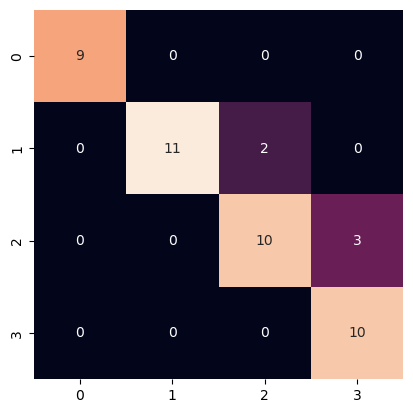

In [21]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
#plt.xlabel('true label')
#plt.ylabel('predicted label');

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.85      1.00      0.92        11
           3       0.77      0.83      0.80        12
           4       1.00      0.77      0.87        13

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.90      0.89      0.89        45



In [ ]:
#training and validation accuracy

In [28]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (100*mean(scores), 100*std(scores)))

Accuracy: 90.333 (4.583)


In [30]:
#Testing Accuracy
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        15
           2       0.79      0.94      0.86        16
           3       0.88      0.88      0.88         8
           4       1.00      1.00      1.00         6

    accuracy                           0.89        45
   macro avg       0.92      0.90      0.91        45
weighted avg       0.90      0.89      0.89        45



In [33]:
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

def cross_validation(model,x,y, cv=5):     
    scoring={'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_macro': make_scorer(f1_score, average = 'macro'),
           #'f1_weighted': make_scorer(f1_score, average = 'weighted')
        }    
    results = cross_validate(model, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
             "Validation Accuracy scores": results['test_accuracy'], 
            
              "Training Precision scores": results['train_precision'],
              "Validation Precision scores": results['test_precision'],
          
              "Training Recall scores": results['train_recall'],
             "Validation Recall scores": results['test_recall'],
            
              "Training F1 scores": results['train_f1_macro'],
             "Validation F1 scores": results['test_f1_macro'],
            
             "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Mean Training Precision": results['train_precision'].mean(),
              "Mean Validation Precision": results['test_precision'].mean(),
              "Mean Training Recall": results['train_recall'].mean(),
              "Mean Validation Recall": results['test_recall'].mean(),
              "Mean Training F1 Score": results['train_f1_macro'].mean(),
              "Mean Validation F1 Score": results['test_f1_macro'].mean()
                      }


result = cross_validation(model, x_train,y_train, 5)
print(result)

{'Training Accuracy scores': array([0.86904762, 0.91666667, 0.91666667, 0.88095238, 0.88095238]), 'Validation Accuracy scores': array([1.        , 0.80952381, 0.76190476, 0.9047619 , 0.95238095]), 'Training Precision scores': array([0.87395224, 0.92408104, 0.92340909, 0.88324899, 0.88711014]), 'Validation Precision scores': array([1.        , 0.825     , 0.76190476, 0.9375    , 0.95833333]), 'Training Recall scores': array([0.8746123 , 0.92068182, 0.91980159, 0.8840873 , 0.88459596]), 'Validation Recall scores': array([1.        , 0.81666667, 0.79166667, 0.90833333, 0.96428571]), 'Training F1 scores': array([0.87273184, 0.91861595, 0.92128738, 0.882916  , 0.882916  ]), 'Validation F1 scores': array([1.        , 0.81313131, 0.7534188 , 0.91378066, 0.95804196]), 'Mean Training Accuracy': 89.28571428571426, 'Mean Validation Accuracy': 88.57142857142856, 'Mean Training Precision': 0.8983602985708249, 'Mean Validation Precision': 0.896547619047619, 'Mean Training Recall': 0.8967557932263815

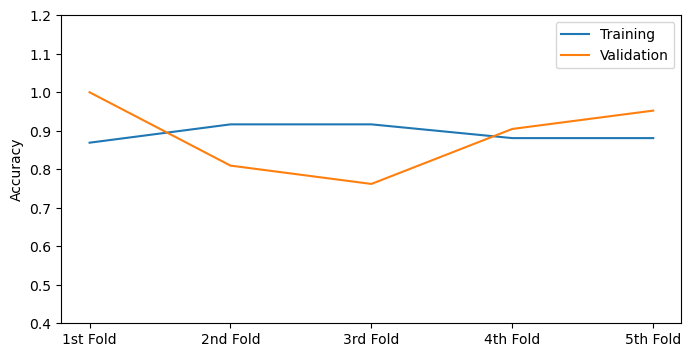

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold","7th Fold"]
X_axis = np.arange(len(labels))
plt.xticks(X_axis, labels)  
# Function to plot  
plt.ylim(0.40000, 1.2)
plt.plot(result["Training Accuracy scores"])
plt.plot(result["Validation Accuracy scores"])
plt.ylabel("Accuracy")  
# Function add a legend  
plt.legend(["Training", "Validation"], loc ="upper right")
  
# function to show the plot
plt.show()

Tuned Hyperparameters : {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Accuracy : 0.757707509881423


In [1]:
#y_pred=grid.predict(x_test)
#print(classification_report(y_test,y_pred))

In [8]:

import numpy as np
def plot_result(x_label, y_label, plot_title, train_data, val_data):
               
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.2, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.2, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

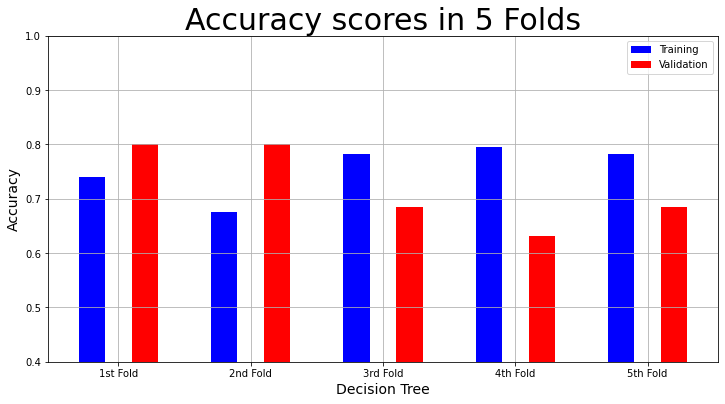

In [9]:
# Plot Accuracy Result
from matplotlib import pyplot as plt
%matplotlib inline
model_name = "Support Vector Machine"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            result["Training Accuracy scores"],
            result["Validation Accuracy scores"])